In [ ]:
!pip install mediapipe opencv-python

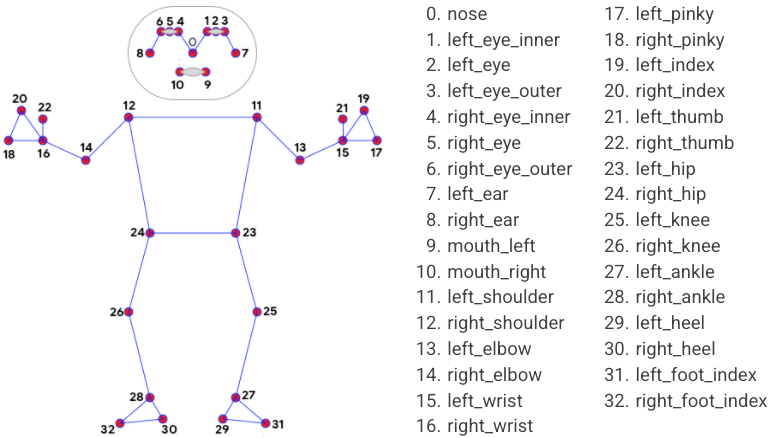

In [ ]:
import cv2
import mediapipe as mp 
import numpy as np 
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose 

# Setup Time Series
leftShoulderX, leftShoulderY, rightShoulderX, rightShoulderY, leftElbowX, leftElbowY, rightElbowX, rightElbowY = [],[],[],[],[],[],[],[]

count = 0 

# Webcam setup - Parameter in cv2.VideoCapture may differ per person
cap = cv2.VideoCapture(1) 

# Setup Mediapipe post estimation instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose: 
    while cap.isOpened(): 
        ret, frame = cap.read()
        
        # Recolor image to RGB 
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False 
        
        # Make detection
        results = pose.process(image)
        
        # Recolor back to BGR
        image.flags.writeable = False 
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        try: 
            landmarks = results.pose_landmarks.landmark
            print(landmarks)
        except:
            pass
        
        # Render 
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2),
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                 )

        cv2.imshow("MediaPipe Feed", image)
        
        if count % 10 == 0:
        
            leftShoulderX.append([count, landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x])
            leftShoulderY.append([count, landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y])

            rightShoulderX.append([count, landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x])
            rightShoulderY.append([count, landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y])

            leftElbowX.append([count, landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x])
            leftElbowY.append([count, landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y])

            rightElbowX.append([count, landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x])
            rightElbowY.append([count, landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y])

        count+=1

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

In [21]:
len(landmarks)

33

In [2]:
landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value]

x: 0.5605530142784119
y: 2.4017043113708496
z: 0.4005720615386963
visibility: 0.0023907595314085484

In [6]:
count

188

In [4]:
rightElbowX = np.array(rightElbowX)
rightElbowY = np.array(rightElbowY)
leftElbowX = np.array(leftElbowX)
leftElbowY = np.array(leftElbowY)
rightShoulderX = np.array(rightShoulderX)
rightShoulderY = np.array(rightShoulderY)
leftShoulderX = np.array(leftShoulderY)
leftShoulderY = np.array(leftShoulderY)

In [5]:
from matplotlib import pyplot as plt

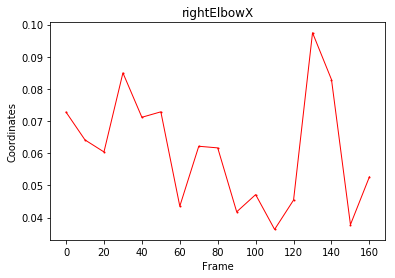

In [9]:
x1, y1 = rightElbowX.T
plt.plot(x1, y1, color='red', linewidth=1, label="rightElbowX")
plt.xlabel("Frame")
plt.ylabel("Coordinates")
plt.title("rightElbowX")
plt.scatter(x1, y1, color='red', s=1)
plt.show()

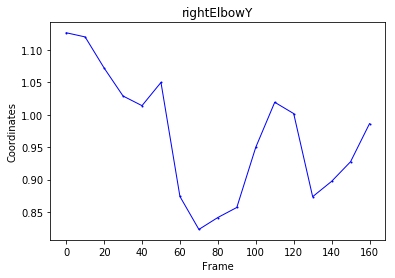

In [10]:
x1, y1 = rightElbowY.T
plt.plot(x1, y1, color='blue', linewidth=1, label="rightElbowY")
plt.xlabel("Frame")
plt.ylabel("Coordinates")
plt.title("rightElbowY")
plt.scatter(x1, y1, color='blue', s=1)
plt.show()

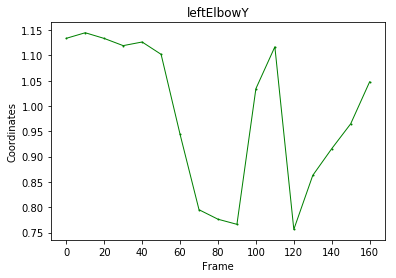

In [12]:
x1, y1 = leftElbowY.T
plt.plot(x1, y1, color='green', linewidth=1, label="leftElbowY")
plt.xlabel("Frame")
plt.ylabel("Coordinates")
plt.title("leftElbowY")
plt.scatter(x1, y1, color='green', s=1)
plt.show()

In [19]:
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean

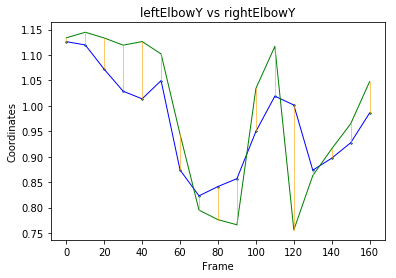

1.1599072217941284
[(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6), (7, 7), (8, 8), (9, 9), (10, 10), (11, 11), (12, 12), (13, 13), (14, 14), (15, 15), (16, 16)]


In [23]:
plt.xlabel("Frame")
plt.ylabel("Coordinates")
plt.title("leftElbowY vs rightElbowY")

x1, y1 = rightElbowY.T
plt.plot(x1, y1, color='blue', linewidth=1, label="rightElbowY")
plt.scatter(x1, y1, color='blue', s=1)

x2, y2 = leftElbowY.T
plt.plot(x2, y2, color='green', linewidth=1, label="leftElbowY")
plt.scatter(x1, y1, color='green', s=1)

distance, path = fastdtw(leftElbowY, rightElbowY, dist=euclidean)
for i in path:
    xcoord, ycoord = zip(leftElbowY[i[0]], rightElbowY[i[1]])
    plt.plot(xcoord, ycoord, color='orange', linewidth=0.6)
plt.show()
print(distance)
print(path)